In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d atharvadumbre/indian-sign-language-islrtc-referred

Dataset URL: https://www.kaggle.com/datasets/atharvadumbre/indian-sign-language-islrtc-referred
License(s): CC-BY-NC-SA-4.0


In [3]:
!unzip "indian-sign-language-islrtc-referred.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/original_images/V/1.jpg  
  inflating: /content/dataset/original_images/V/10.jpg  
  inflating: /content/dataset/original_images/V/100.jpg  
  inflating: /content/dataset/original_images/V/1000.jpg  
  inflating: /content/dataset/original_images/V/101.jpg  
  inflating: /content/dataset/original_images/V/102.jpg  
  inflating: /content/dataset/original_images/V/103.jpg  
  inflating: /content/dataset/original_images/V/104.jpg  
  inflating: /content/dataset/original_images/V/105.jpg  
  inflating: /content/dataset/original_images/V/106.jpg  
  inflating: /content/dataset/original_images/V/107.jpg  
  inflating: /content/dataset/original_images/V/108.jpg  
  inflating: /content/dataset/original_images/V/109.jpg  
  inflating: /content/dataset/original_images/V/11.jpg  
  inflating: /content/dataset/original_images/V/110.jpg  
  inflating: /content/dataset/original_images/V/111.jpg  
  inflating: /content/da

In [4]:
import os
import pandas as pd

# Define dataset directory
dataset_dir = "dataset/original_images"  # 🔹 Update this path

# Define label mapping for 0-9 and A-Z
categories = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18,
    'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27,
    'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35
}


# Initialize list to store data
data = []

# Iterate through each category directory
for category in categories:
    category_path = os.path.join(dataset_dir, category)

    if os.path.exists(category_path):  # Ensure directory exists
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            data.append((filename, category))  # Store filename & category

# Create DataFrame
df = pd.DataFrame(data, columns=["filename", "category"])
df = df.sample(frac=1).reset_index(drop=True)
# Display first few rows
print(df.head())

# save as CSV
df.to_csv("dataset_info.csv", index=False)


  filename category
0  108.jpg        5
1  874.jpg        X
2  358.jpg        6
3  523.jpg        D
4  617.jpg        T


In [5]:
print(len(df))

36000


In [6]:
df['category'].value_counts()

category
5    1000
X    1000
6    1000
D    1000
T    1000
V    1000
P    1000
A    1000
C    1000
B    1000
3    1000
J    1000
I    1000
8    1000
1    1000
S    1000
K    1000
M    1000
Q    1000
0    1000
L    1000
Y    1000
U    1000
W    1000
F    1000
9    1000
N    1000
Z    1000
H    1000
G    1000
O    1000
E    1000
2    1000
R    1000
7    1000
4    1000
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

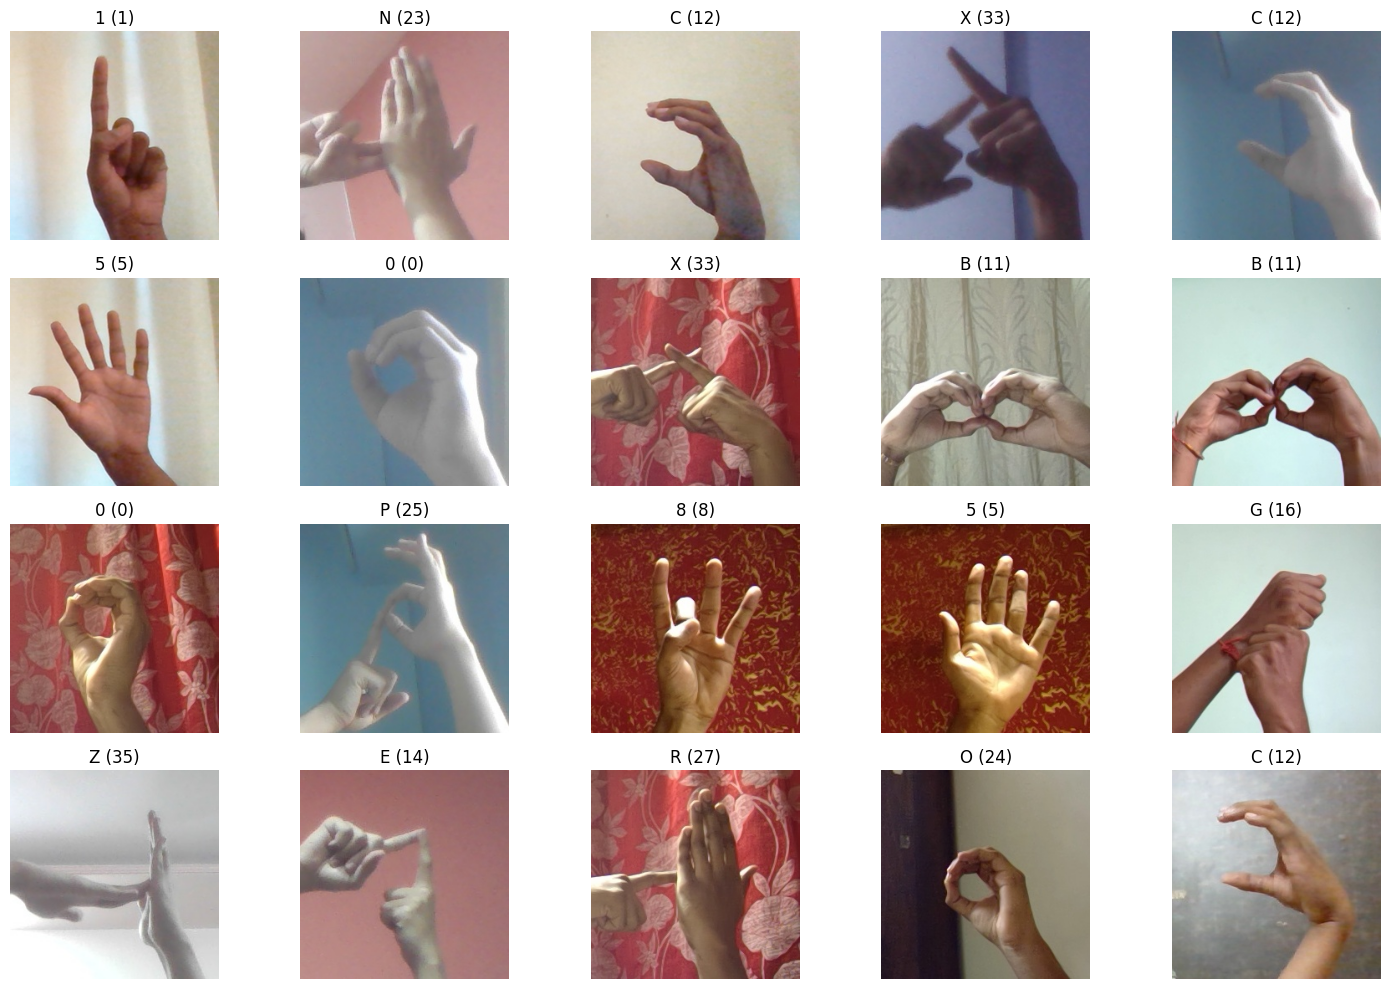

In [8]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Define dataset directory
dataset_dir = "dataset/original_images"  # 🔹 Update this path


# Get all image paths with labels
image_paths = []
for class_name,num_label in categories.items():
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.exists(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        image_paths.extend([(img, num_label, class_name) for img in images])  # Store (image path, numerical label, string label)

# Randomly select 20 images
random_images = random.sample(image_paths, 20)

# Plot images
plt.figure(figsize=(15, 10))
for i, (img_path, num_label, str_label) in enumerate(random_images):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Could not load image {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.subplot(4, 5, i+1)  # 4 rows, 5 columns
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{str_label} ({num_label})")  # Show both string & numerical labels

plt.tight_layout()
plt.show()


In [9]:
import albumentations as A
from tqdm import tqdm

# Define paths
input_dir = "dataset/original_images"  # Folder containing '0-9' and 'A-Z' subfolders
output_dir = "dataset/augmented_dataset"  # New folder for augmented images

# Define Albumentations transformation pipeline
augment = A.Compose([
    A.GaussNoise(std_range=(0.01, 0.05), p=1.0), # Add slight noise
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.4,p=0.5),
    A.UnsharpMask(alpha=(0.2, 0.5), p=1.0),
     A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=1.0)
])

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process all folders (1-9, a-z)
for category in tqdm(os.listdir(input_dir)):
    category_path = os.path.join(input_dir, category)
    output_category_path = os.path.join(output_dir, category)
    os.makedirs(output_category_path, exist_ok=True)  # Create folder for each category

    # Process all images in the category
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Apply augmentation
        augmented = augment(image=image)["image"]

        # Convert back to BGR for saving
        augmented_bgr = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

        # Save augmented image with a new name
        new_filename = f"aug_{img_name}"  # Add "aug_" prefix to avoid overwriting
        save_path = os.path.join(output_category_path, new_filename)
        cv2.imwrite(save_path, augmented_bgr)

100%|██████████| 36/36 [05:24<00:00,  9.03s/it]


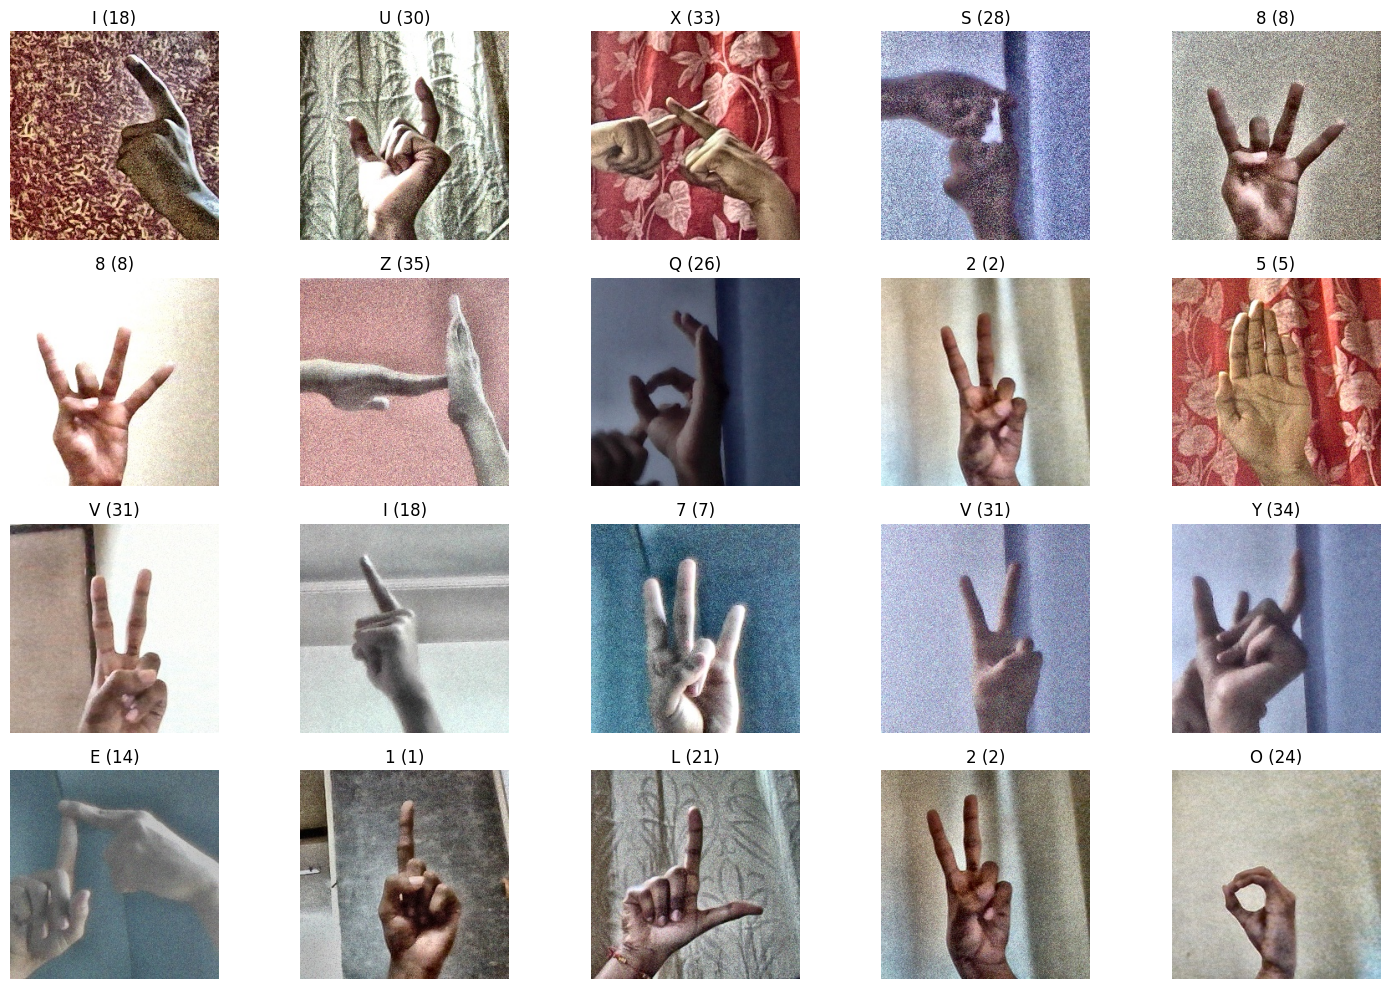

In [10]:
# Define dataset directory
dataset_dir = "dataset/augmented_dataset"


# Get all image paths with labels
image_paths = []
for class_name,num_label in categories.items():
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.exists(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        image_paths.extend([(img, num_label, class_name) for img in images])  # Store (image path, numerical label, string label)

# Randomly select 20 images
random_images = random.sample(image_paths, 20)

# Plot images
plt.figure(figsize=(15, 10))
for i, (img_path, num_label, str_label) in enumerate(random_images):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Could not load image {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.subplot(4, 5, i+1)  # 4 rows, 5 columns
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{str_label} ({num_label})")  # Show both string & numerical labels

plt.tight_layout()
plt.show()


In [12]:
import os
import random
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Define dataset paths
dataset_path = "dataset/augmented_dataset"
output_base = "dataset/split_dataset"

# Create output directories
train_dir = os.path.join(output_base, "train")
valid_dir = os.path.join(output_base, "valid")
test_dir = os.path.join(output_base, "test")

for dir in [train_dir, valid_dir, test_dir]:
    os.makedirs(dir, exist_ok=True)

train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df["category"], random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["category"], random_state=42)

def move_images(df_split, split_name):
    for _, row in df_split.iterrows():
        category, filename = row["category"], row["filename"]
        filename = f"aug_{filename}"  # Add "aug_" prefix
        src = os.path.join(dataset_path, category, filename)
        dest_dir = os.path.join(output_base, split_name, category)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(src, os.path.join(dest_dir, filename))

move_images(train_df, "train")
move_images(valid_df, "valid")
move_images(test_df, "test")

# Print dataset sizes
print(f"Train Size: {len(train_df)}, Validation Size: {len(valid_df)}, Test Size: {len(test_df)}")


Train Size: 28800, Validation Size: 3600, Test Size: 3600


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1.0/255)

In [14]:
train_path = 'dataset/split_dataset/train'
val_path = 'dataset/split_dataset/valid'
test_path = 'dataset/split_dataset/test'

BATCH_SIZE = 32
IMG_SIZE = 200
IMG_CHANNEL = 3  #RGB
N_CLASSES = 36

In [15]:
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size = BATCH_SIZE,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(IMG_SIZE,IMG_SIZE),
                                       batch_size = BATCH_SIZE,
                                       class_mode='categorical',
                                       )

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size = BATCH_SIZE,
                                         class_mode='categorical',
                                         shuffle= False)

Found 28800 images belonging to 36 classes.
Found 3600 images belonging to 36 classes.
Found 3600 images belonging to 36 classes.


In [16]:
from tensorflow.keras.layers import Layer,Conv2D,BatchNormalization,MaxPooling2D,GlobalAveragePooling2D,Dense,Activation,Add
from tensorflow.keras import Model

In [17]:
class SEBlock(tf.keras.layers.Layer):
    """ Squeeze-and-Excitation Block """
    def __init__(self, filters, reduction=16):
        super(SEBlock, self).__init__()
        self.global_pool = GlobalAveragePooling2D()
        self.fc1 = Dense(filters // reduction, activation="relu")
        self.fc2 = Dense(filters, activation="sigmoid")

    def call(self, x):
        scale = self.global_pool(x)
        scale = self.fc1(scale)
        scale = self.fc2(scale)
        return x * tf.expand_dims(tf.expand_dims(scale, 1), 1)

In [18]:
from tensorflow.keras.layers import DepthwiseConv2D,LayerNormalization,Dropout

In [19]:
class DepthwiseResidualBlock(tf.keras.layers.Layer):
    """ Residual Block using Depthwise Separable Convolution + SE + DropPath """
    def __init__(self, filters, stride=1, drop_path_rate=0.1):
        super(DepthwiseResidualBlock, self).__init__()

        self.depthwise = DepthwiseConv2D(kernel_size=3, strides=stride, padding="same", depth_multiplier=1)
        self.pointwise = Conv2D(filters, kernel_size=1, activation=None)
        self.norm = LayerNormalization()
        self.se = SEBlock(filters)
        self.drop_path = Dropout(drop_path_rate) if drop_path_rate > 0 else tf.identity
        self.shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same") if stride > 1 else tf.identity

    def call(self, x, training=True):
        residual = x
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.norm(x)
        x = Activation('mish')(x)
        x = self.se(x)
        x = self.drop_path(x, training=training)
        return Add()([self.shortcut(residual), x])

In [20]:
class my_model(Model):
    def __init__(self, num_classes):
        super(my_model, self).__init__()

        self.conv_1 = DepthwiseConv2D(7, strides=2, padding='same', depth_multiplier=1)
        self.pointwise_1 = Conv2D(64, 1, activation="relu")
        self.max_pool = MaxPooling2D(3, 2)

        self.conv_2_1 = DepthwiseResidualBlock(64)
        self.drop_1 = Dropout(0.3)

        self.conv_3_1 = DepthwiseResidualBlock(128, stride=2)
        self.conv_3_2 = DepthwiseResidualBlock(128)
        self.drop_2 = Dropout(0.3)

        self.conv_4_1 = DepthwiseResidualBlock(256, stride=2)
        self.conv_4_2 = DepthwiseResidualBlock(256)
        self.drop_3 = Dropout(0.3)

        self.conv_5_1 = DepthwiseResidualBlock(512, stride=2)
        self.conv_5_2 = DepthwiseResidualBlock(512)
        self.drop_4 = Dropout(0.3)

        self.global_pool = GlobalAveragePooling2D()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, x, training=True):
        x = self.conv_1(x)
        x = self.pointwise_1(x)
        x = self.max_pool(x)

        x = self.conv_2_1(x, training=training)
        x = self.drop_1(x, training=training)

        x = self.conv_3_1(x, training=training)
        x = self.conv_3_2(x, training=training)
        x = self.drop_2(x, training=training)

        x = self.conv_4_1(x, training=training)
        x = self.conv_4_2(x, training=training)
        x = self.drop_3(x, training=training)

        x = self.conv_5_1(x, training=training)
        x = self.conv_5_2(x, training=training)
        x = self.drop_4(x, training=training)

        x = self.global_pool(x)
        return self.fc(x)

In [21]:
MyModel = my_model(N_CLASSES)
MyModel(tf.zeros([1,IMG_SIZE,IMG_SIZE,3]), training = False)
MyModel.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ depthwise_conv2d (DepthwiseConv2D)   │ (1, 100, 100, 3)            │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (1, 100, 100, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_residual_block             │ ?                           │           5,508 │
│ (DepthwiseResidualBlock)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_residual_block_1           │ ?                           │          19,720 │
│ (DepthwiseResidualBlock)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_residual_block_2           │ ?                           │          20,232 │
│ (DepthwiseResidualBlock)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_residual_block_3           │ ?                           │          76,304 │
│ (DepthwiseResidualBlock)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_residual_block_4           │ ?                           │          77,328 │
│ (DepthwiseResidualBlock)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_residual_block_5           │ ?                           │         300,064 │
│ (DepthwiseResidualBlock)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_residual_block_6           │ ?                           │         302,112 │
│ (DepthwiseResidualBlock)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (1, 36)                     │          18,468 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 820,142 (3.13 MB)

 Trainable params: 820,142 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy , TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam

In [23]:
checkpoint_callback = ModelCheckpoint(
    'best_weights_file.keras',
    monitor='val_accuracy',
    mode = 'max',
    verbose=1,
    save_best_only=True,
    )
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

In [24]:
loss_function = CategoricalCrossentropy()

In [25]:
metrics = [CategoricalAccuracy(name='accuracy'),TopKCategoricalAccuracy(k=2,name='top_2_accuracy')]

In [26]:
MyModel.compile(
    optimizer=Adam(learning_rate=1e-3),
    metrics = metrics,
    loss = loss_function
)

In [27]:
history = MyModel.fit(
    train_data,
    validation_data = val_data,
    epochs = 10,
    verbose = 1,
    callbacks = [checkpoint_callback,early_stopping,reduce_learning_rate]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0339 - loss: 3.6517 - top_2_accuracy: 0.0671
Epoch 1: val_accuracy improved from -inf to 0.17111, saving model to best_weights_file.keras
900/900 ━━━━━━━━━━━━━━━━━━━━ 102s 79ms/step - accuracy: 0.0339 - loss: 3.6515 - top_2_accuracy: 0.0672 - val_accuracy: 0.1711 - val_loss: 2.8502 - val_top_2_accuracy: 0.2744 - learning_rate: 0.0010
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2414 - loss: 2.5635 - top_2_accuracy: 0.3796
Epoch 2: val_accuracy improved from 0.17111 to 0.73139, saving model to best_weights_file.keras
900/900 ━━━━━━━━━━━━━━━━━━━━ 71s 79ms/step - accuracy: 0.2416 - loss: 2.5629 - top_2_accuracy: 0.3798 - val_accuracy: 0.7314 - val_loss: 0.9114 - val_top_2_accuracy: 0.8636 - learning_rate: 0.0010
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7072 - loss: 0.9490 - top_2_accuracy: 0.8472
Epoch 3: val_accuracy improved from 0.73139 to 0.88361, saving model to best_weights_file.k

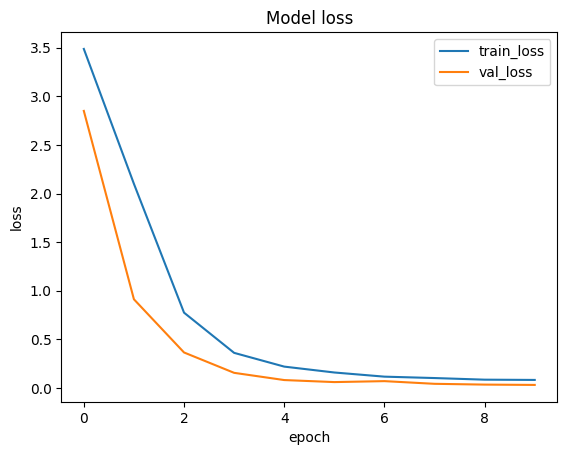

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

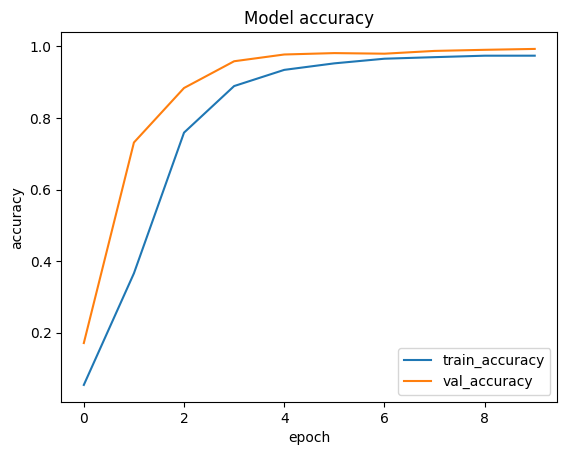

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [30]:
MyModel.load_weights('best_weights_file.keras')

In [31]:
MyModel.evaluate(val_data)

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.9930 - loss: 0.0352 - top_2_accuracy: 0.9982


[0.030039723962545395, 0.9927777647972107, 0.9988889098167419]

Found 3600 images belonging to 36 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


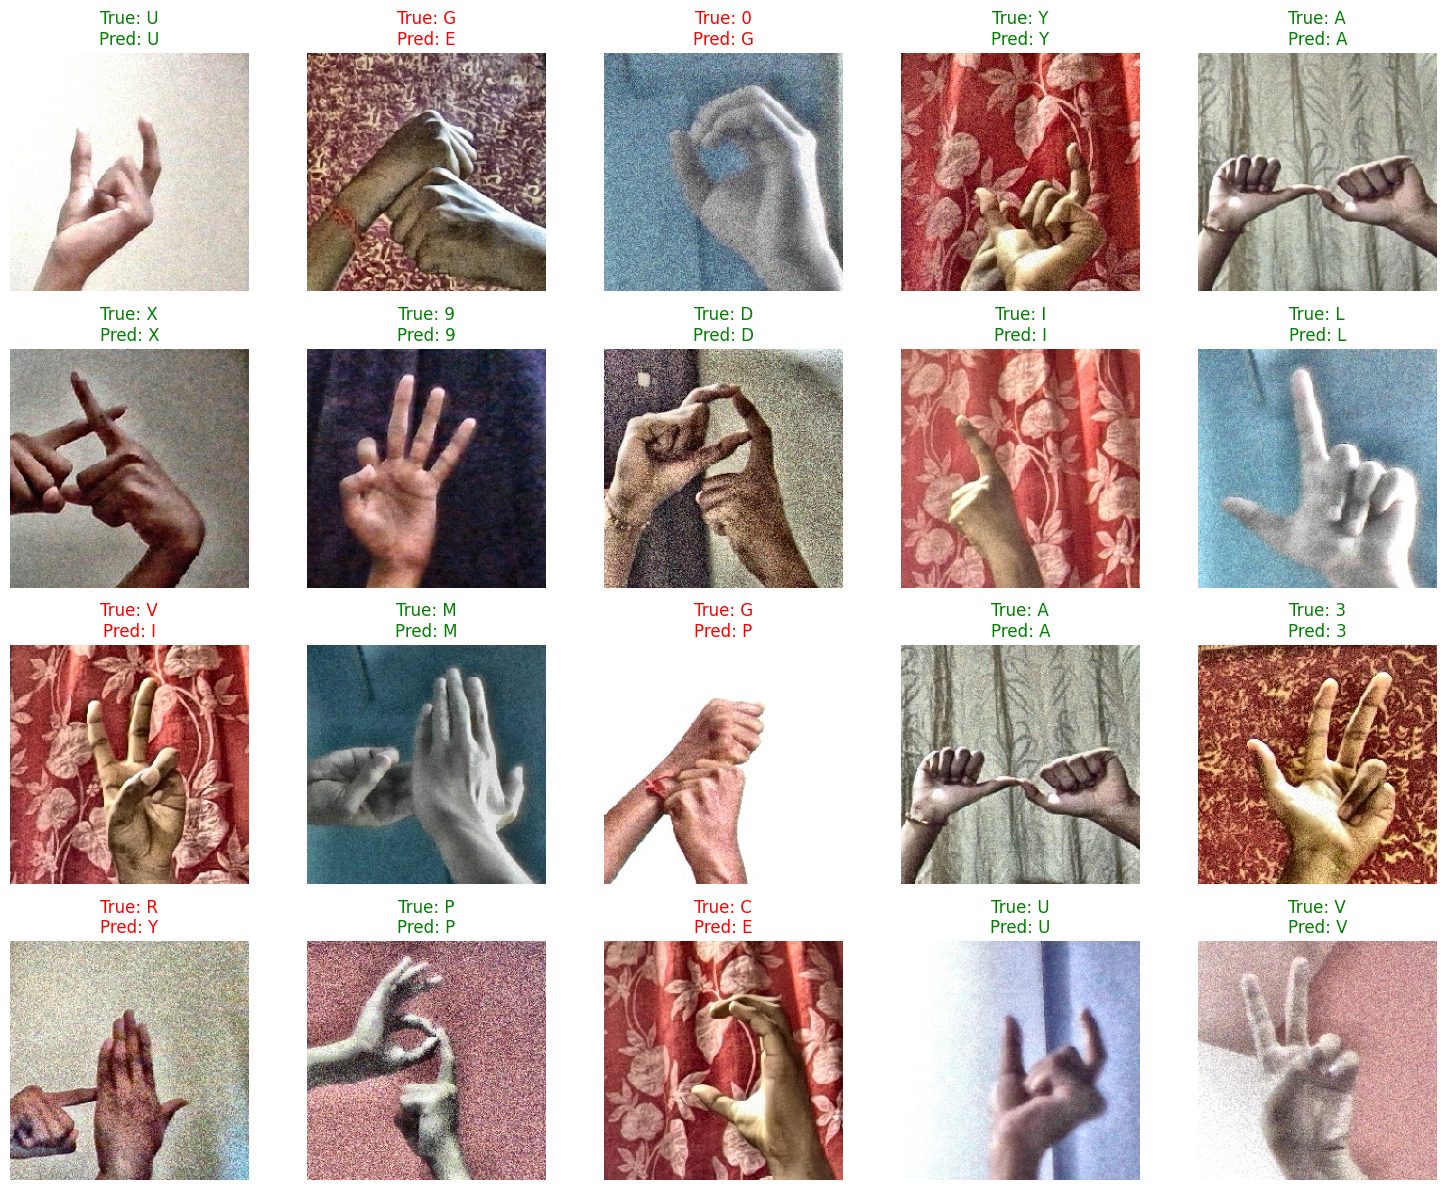

In [32]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test directory path
test_dir = "dataset/split_dataset/test"

# Load test images
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Adjust based on model input
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # No shuffling for test data
)

# Get class indices and reverse map them
class_indices = test_generator.class_indices  # {'0': 0, '1': 1, ..., 'Z': 35}
inverse_class_map = {v: k for k, v in class_indices.items()}  # {0: '0', 1: '1', ..., 35: 'Z'}

# Select 20 random images from the test directory
file_paths = test_generator.filepaths
random_files = random.sample(file_paths, 20)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 12))

for i, file_path in enumerate(random_files):
    img = image.load_img(file_path, target_size=(224, 224))  # Load image
    img_array = image.img_to_array(img) / 255.0  # Convert to array & normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get true label from the file path
    true_label = os.path.basename(os.path.dirname(file_path))  # Folder name
    true_label_num = class_indices[true_label]  # Convert folder name to numeric label

    # Predict using the model
    pred_label_num = np.argmax(MyModel.predict(img_array))  # Get predicted label
    pred_label = inverse_class_map[pred_label_num]  # Convert numeric to category

    # Display image with labels
    ax = axes[i // 5, i % 5]  # Get subplot position
    ax.imshow(img)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=12, color='green' if true_label == pred_label else 'red')
    ax.axis("off")

plt.tight_layout()
plt.show()


Found 3600 images belonging to 36 classes.
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.98      1.00      0.99       100
           2       0.98      0.99      0.99       100
           3       1.00      1.00      1.00       100
           4       0.93      0.95      0.94       100
           5       1.00      0.95      0.97       100
           6       0.99      0.99      0.99       100
           7       0.96      1.00      0.98       100
           8       0.95      1.00      0.98       100
           9       1.00      0.94      0.97       100
           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       0.99      1.00      1.00       100
           D       1.00      0.99      0.99       100
           E       0.99      0.99      0.99       100
           F       0.96  

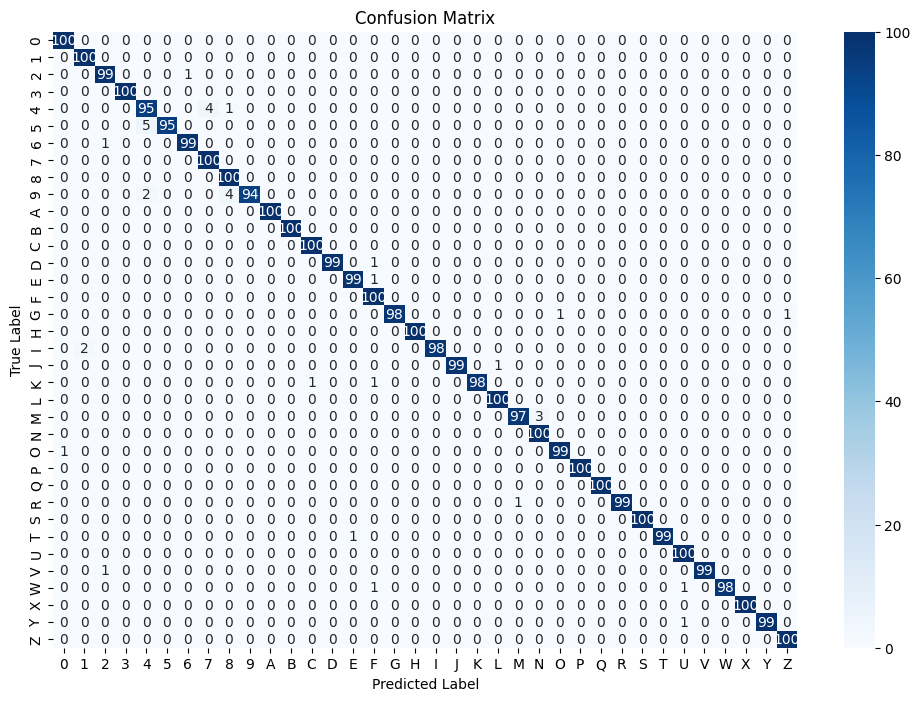

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Define test directory path
test_dir = "dataset/split_dataset/test"

# Load test images (No shuffling, rescale to match training data)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Ensure correct mapping
)

# Get true labels
true_labels = test_generator.classes  # Numeric labels from directory

# Predict on test images
predictions  = MyModel.predict(test_generator)
pred_labels = np.argmax(predictions, axis=1)  # Convert one-hot to numeric labels

# Generate Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# Print Classification Report
print("Classification Report:\n", classification_report(true_labels, pred_labels, target_names=inverse_class_map.values()))

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=inverse_class_map.values(), yticklabels=inverse_class_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
